<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/Simplified_EDA_Lab_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Program 8**

Download a Twitter dataset containing tweets about a specific brand or event.

  a. Utilize libraries like NLTK or TextBlob to perform sentiment analysis on the
tweets.

  b. Explore the distribution of positive, negative, and neutral sentiment.
  
  c. Identify keywords or phrases associated with each sentiment category.

**Program's Objectives:**

- Sentiment Analysis is a text-based EDA tool—it helps quantify subjective opinions (turning text into numbers like polarity scores).

- The sentiment distribution chart shows how opinions are spread (positive/negative/neutral).

- The top word analysis is about identifying key themes/keywords in the text—like basic feature exploration of unstructured data.

Package/Library Used and its Purpose

- pandas
  - Why?
    - To read CSV files and manipulate tabular data easily.
  - Key function used:
    - pd.read_csv() reads data into a DataFrame
    - dropna() cleans missing data.
- textblob
  - Why?
    - It provides a simple API for natural language tasks like sentiment analysis.
  - Key function used:
    - TextBlob(text).sentiment.polarity: Returns a float between -1 (negative) and +1 (positive).
  - Transforms qualitative data (text) into quantitative insight (sentiment score).

- matplotlib.pyplot
  - Why?
    - For basic plotting and visualization.
  -Key function used:
    - plot(kind='bar') plots a simple bar chart.
  - Visualizing data distributions helps spot patterns immediately.

- nltk
    - Why?
      - To get stopwords (common words like "the", "and") that don't carry much meaning and are often filtered out.
  - Preprocessing text is key to extracting meaningful keywords.

- collections.Counter
  - Why?
    - To count word frequencies easily.
  - This identifies the most common terms or features in the text.




What are Stop words?

Stop words are commonly used words in a language that are often filtered out before or during natural language processing (NLP) tasks like text analysis, sentiment analysis, or search indexing. These words usually don't carry significant meaning or contribute much to the analysis of the text.

Examples of Stop Words in English:

- Articles: a, an, the

- Conjunctions: and, but, or, so

- Prepositions: in, on, at, by, with

- Pronouns: he, she, it, they, we

- Others: is, am, are, was, were, be, to, of, for



In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NLTK corpora (plural of corpus) are collections of text data that are bundled with or available through the NLTK library. These corpora are used for training, testing, or learning about natural language processing tasks such as tokenization, tagging, parsing, and more.


**What is a Corpus?**

A corpus is simply a body of text, usually collected and structured for linguistic analysis.

Example corpora types:

- Collections of books or articles

- Tagged parts of speech texts

- Lists of stop words

- Word lists like names or common nouns

- Annotated datasets for machine learning tasks





TextBlob.sentiment.polarity

In [1]:
from textblob import TextBlob

sentences = [
    "I love this laptop!",
    "The service was terrible.",
    "It's an average experience.",
    "Absolutely fantastic performance!",
    "I'm not happy with this product.",
    "This is a laptop.",
    "Worst purchase ever made.",
    "I guess it’s okay, not too bad.",
    "Totally worth the money.",
    "It doesn’t work at all."
]

for sentence in sentences:
    blob = TextBlob(sentence)
    print(f"Sentence: {sentence}")
    print(f"Polarity: {blob.sentiment.polarity}\n")


Sentence: I love this laptop!
Polarity: 0.625

Sentence: The service was terrible.
Polarity: -1.0

Sentence: It's an average experience.
Polarity: -0.15

Sentence: Absolutely fantastic performance!
Polarity: 0.5

Sentence: I'm not happy with this product.
Polarity: -0.4

Sentence: This is a laptop.
Polarity: 0.0

Sentence: Worst purchase ever made.
Polarity: -1.0

Sentence: I guess it’s okay, not too bad.
Polarity: -0.09999999999999992

Sentence: Totally worth the money.
Polarity: 0.3

Sentence: It doesn’t work at all.
Polarity: 0.0



What's happening internally?

- TextBlob uses a lexicon-based approach (specifically PatternAnalyzer by default).

- Each word in the text is matched against a sentiment dictionary that has predefined polarity values.

- The overall polarity is calculated by:

- Summing up the polarity scores of individual words

- Adjusting for grammar (negations like "not good" will reverse the meaning)

- Taking into account intensifiers like "very", "extremely", etc.


# Step by Step Code Walk Through:
 1. Import Libraries and Load dataset

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import nltk

df = pd.read_csv("Tweets.csv") #Reads a CSV file into a DataFrame (df).
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

2. Drop missing values

In [ ]:
df.dropna(subset=['airline_sentiment', 'text'], inplace=True) #Drops rows where any column listed is missing.

3. Perform sentiment analysis + labeling

In [ ]:
df['sentiment_label'] = df['text'].apply(
    lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0
    else ('negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
)

- apply() applies a function to every row.

- lambda is a quick anonymous function.

- For each text, it:

  - Calculates polarity (using TextBlob).
  - Converts the score to a label.



4. Plot sentiment distribution

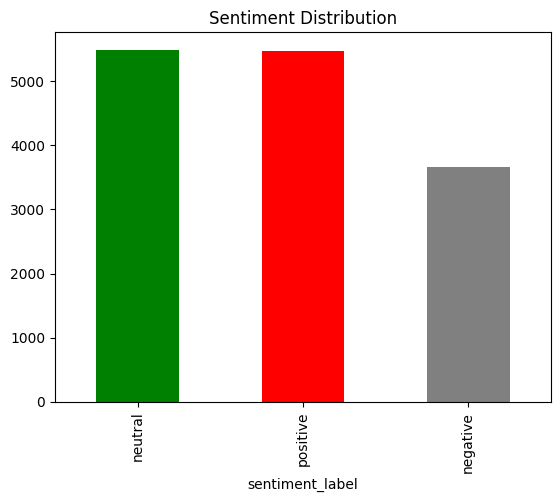

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

5. Get top words

In [ ]:
stop_words = set(stopwords.words('english'))

def top_words(series, n=10):
    words = " ".join(series).lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return Counter(words).most_common(n)

- " ".join(series) merges all tweets into one long string.

- .lower() standardizes case.

- .split() breaks into words.

- isalpha() filters out numbers/punctuation.




### 🛠 Flow of `top_words`

Pandas Series (collection of tweets/texts)


  ▼

1️⃣ Join all rows into one BIG string

e.g., "I love this phone The phone is great Great battery and great price"

  ▼

2️⃣ Convert to lowercase + split into words

['i', 'love', 'this', 'phone', 'the', 'phone', 'is', 'great', 'great', 'battery', 'and', 'great', 'price']

  ▼

3️⃣ Remove stopwords + non-alphabet words

['love', 'phone', 'phone', 'great', 'great', 'battery', 'great', 'price']

  ▼

4️⃣ Count word frequency

Counter({

  'great': 3,

  'phone': 2,

  'love': 1,

  'battery': 1,

  'price': 1

})

  ▼

5️⃣ Return top N (e.g., 3)
  
  [('great', 3), ('phone', 2), ('love', 1)]



6. Loop to print top words

In [ ]:
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\nTop words in {sentiment.capitalize()} Tweets:")
    print(top_words(df[df['sentiment_label'] == sentiment]['text']))



Top words in Positive Tweets:
[('flight', 1039), ('thanks', 619), ('get', 450), ('thank', 304), ('would', 284), ('fly', 282), ('cancelled', 277), ('great', 261), ('service', 251), ('customer', 242)]

Top words in Negative Tweets:
[('flight', 987), ('late', 341), ('get', 339), ('cancelled', 303), ('customer', 286), ('service', 273), ('hours', 206), ('worst', 195), ('due', 175), ('still', 168)]

Top words in Neutral Tweets:
[('flight', 1191), ('get', 540), ('cancelled', 467), ('hold', 276), ('thank', 257), ('still', 248), ('need', 248), ('please', 243), ('help', 241), ('us', 211)]


# Dell Tweets 2022

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import nltk

df = pd.read_csv("delltweets.csv") #Reads a CSV file into a DataFrame (df).
print(df.head())

                    Datetime             Tweet Id  \
0  2022-09-30 23:29:15+00:00  1575991191170342912   
1  2022-09-30 21:46:35+00:00  1575965354425131008   
2  2022-09-30 21:18:02+00:00  1575958171423752203   
3  2022-09-30 20:05:24+00:00  1575939891485032450   
4  2022-09-30 20:03:17+00:00  1575939359160750080   

                                                Text        Username  
0  @Logitech @apple @Google @Microsoft @Dell @Len...  ManjuSreedaran  
1  @MK_habit_addict @official_stier @MortalKombat...      MiKeMcDnet  
2  As @CRN celebrates its 40th anniversary, Bob F...        jfollett  
3  @dell your customer service is horrible especi...       daveccarr  
4  @zacokalo @Dell @DellCares @Dell give the man ...      heycamella  


In [ ]:
df.dropna(subset=['Text'], inplace=True) #Drops rows where any column listed is missing.

In [ ]:
df['sentiment_label'] = df['Text'].apply(
    lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0
    else ('negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
)

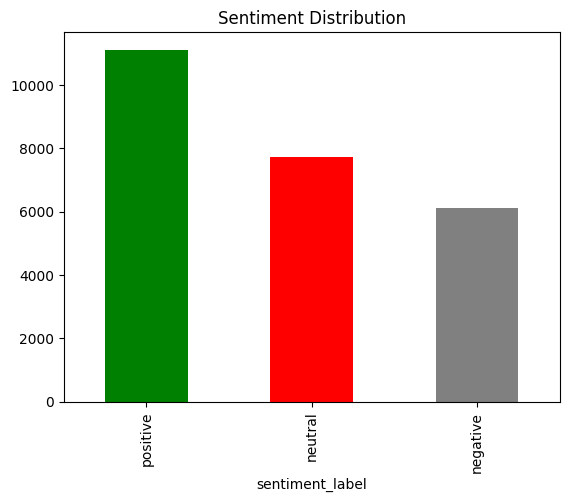

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

def top_words(series, n=10):
    words = " ".join(series).lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    return Counter(words).most_common(n)

In [ ]:
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\nTop words in {sentiment.capitalize()} Tweets:")
    print(top_words(df[df['sentiment_label'] == sentiment]['Text']))



Top words in Positive Tweets:
[('dell', 1615), ('new', 1420), ('laptop', 1322), ('get', 804), ('one', 778), ('like', 733), ('good', 579), ('great', 572), ('would', 557), ('see', 481)]

Top words in Negative Tweets:
[('dell', 1547), ('laptop', 1325), ('service', 1030), ('customer', 754), ('worst', 592), ('support', 503), ('get', 494), ('one', 484), ('buy', 479), ('still', 427)]

Top words in Neutral Tweets:
[('dell', 899), ('laptop', 542), ('get', 410), ('like', 310), ('support', 271), ('one', 259), ('service', 231), ('buy', 224), ('see', 221), ('please', 208)]
